<a href="https://colab.research.google.com/github/BITAN2000/ChatBot-Using-Python/blob/main/ChatGPT_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Mount Drive & Load Dataset**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd

# Replace with your downloaded file path
file_path = "/content/drive/MyDrive/chatgpt_reviews.csv"

df = pd.read_csv(file_path)
df.head()


,Review Id,Review,Ratings,Review Date
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:50
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,2024-08-23 19:20:39


**Basic Cleaning**

In [7]:
df = df.rename(columns=str.lower)
df = df.dropna(subset=['review'])
df['review'] = df['review'].astype(str)
df.head()

,review id,review,ratings,review date
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:50
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,2024-08-23 19:20:39


**Sentiment Analysis (TextBlob & VADER)**

In [8]:
!pip install textblob nltk
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [10]:
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity   # -1 to 1
    vader = sia.polarity_scores(text)['compound'] # -1 to 1
    return pd.Series([polarity, vader])

df[['polarity_tb','polarity_vader']] = df['review'].apply(analyze_sentiment)
df.head()


,review id,review,ratings,review date,polarity_tb,polarity_vader
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05,0.7000,0.4404
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18,0.7000,0.4404
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59,0.6000,0.4215
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:50,0.6000,0.4215
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,2024-08-23 19:20:39,0.4125,0.9427


In [11]:
def label_sentiment(score):
    if score > 0.1: return "Positive"
    elif score < -0.1: return "Negative"
    else: return "Neutral"

df['sentiment'] = df['polarity_vader'].apply(label_sentiment)
df['sentiment'].value_counts()

,count
sentiment,
Positive,149791
Neutral,36566
Negative,10364


**Issue Identification**

In [12]:
issues = {
    "Slow Response": ["slow", "lag", "delay"],
    "Hallucinations": ["wrong", "incorrect", "hallucinate", "not true"],
    "Broken Features": ["error", "bug", "crash"],
    "Poor Understanding": ["not understand", "misunderstood"],
    "UI/UX Issues": ["interface", "design", "layout"],
    "Pricing Complaints": ["expensive", "price", "cost"]
}

def detect_issues(text):
    found = []
    for cat, keys in issues.items():
        for k in keys:
            if k in text.lower():
                found.append(cat)
                break
    return ",".join(found) if found else "None"

df['issues_detected'] = df['review'].apply(detect_issues)
df.head()


,review id,review,ratings,review date,polarity_tb,polarity_vader,sentiment,issues_detected
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05,0.7000,0.4404,Positive,None
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18,0.7000,0.4404,Positive,None
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59,0.6000,0.4215,Positive,None
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:50,0.6000,0.4215,Positive,None
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,2024-08-23 19:20:39,0.4125,0.9427,Positive,None


In [13]:
df['issues_detected'].value_counts()

,count
issues_detected,
None,190958
Broken Features,1909
Hallucinations,1327
UI/UX Issues,967
Slow Response,807
Pricing Complaints,448
"Hallucinations,Broken Features",88
Poor Understanding,64
"Slow Response,Broken Features",59


**Time-Series Sentiment Trend**

In [16]:
df['review date'] = pd.to_datetime(df['review date'])
print(df)

                                   review id  \
0       6fb93778-651a-4ad1-b5ed-67dd0bd35aac   
1       81caeefd-3a28-4601-a898-72897ac906f5   
2       452af49e-1d8b-4b68-b1ac-a94c64cb1dd5   
3       372a4096-ee6a-4b94-b046-cef0b646c965   
4       b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da   
...                                      ...   
196722  462686ff-e500-413c-a6b4-2badc2e3b21d   
196723  f10e0d48-ecb6-42db-b103-46c0046f9be9   
196724  df909a49-90b5-4dac-9b89-c4bd5a7c2f75   
196725  abe43878-973f-4e96-a765-c4af5c7f7b20   
196726  0151001d-b81c-41b5-8927-f56738989625   

                                                   review  ratings  \
0                                                    good        5   
1                                                    good        5   
2                                                nice app        5   
3                                                nice, ig        5   
4       this is a great app, the bot is so accurate to...        5   
...

In [18]:
df_monthly = df.groupby([df['review date'].dt.to_period("M"), 'sentiment']).size().unstack().fillna(0)
df_monthly

sentiment,Negative,Neutral,Positive
review date,,,
2023-07,542,2090,5651
2023-08,574,1343,4884
2023-09,455,1406,5732
2023-10,320,1110,4394
2023-11,501,1618,6600
2023-12,596,1953,7826
2024-01,568,1862,6883
2024-02,537,1588,6623
2024-03,852,2822,11499


**Visualizations**

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


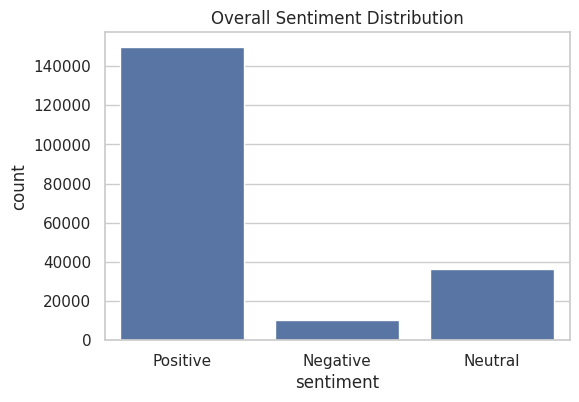

In [20]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['sentiment'])
plt.title("Overall Sentiment Distribution")
plt.show()

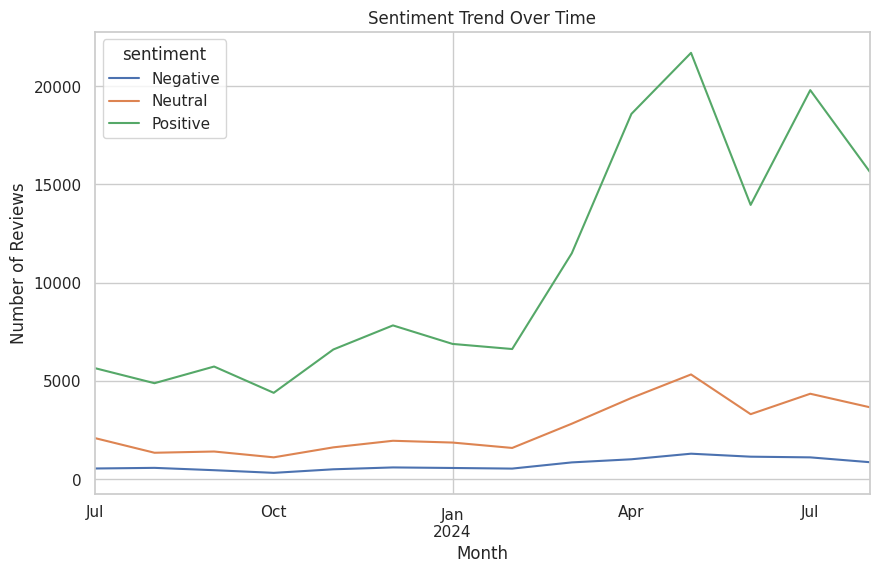

In [21]:
df_monthly.plot(kind='line', figsize=(10,6))
plt.title("Sentiment Trend Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Reviews")
plt.show()

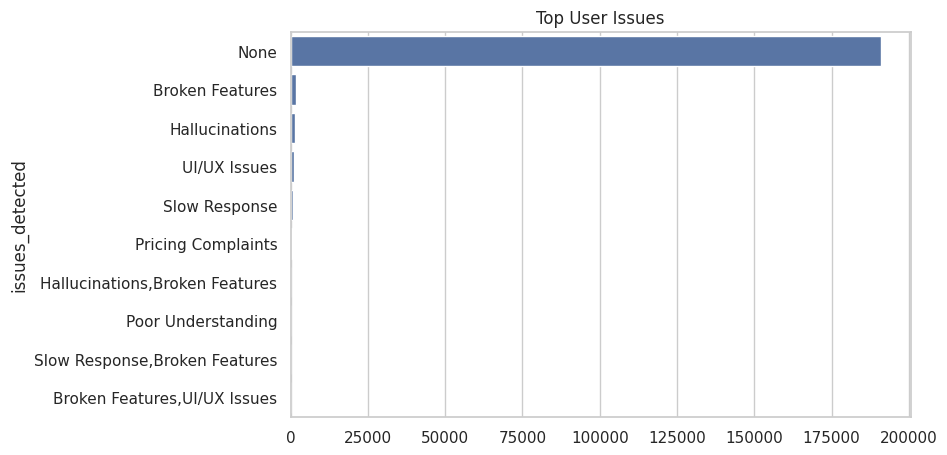

In [22]:
issue_counts = df['issues_detected'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=issue_counts.values, y=issue_counts.index)
plt.title("Top User Issues")
plt.show()

**Wordcloud for Positive / Negative Reviews**

In [23]:
!pip install wordcloud
from wordcloud import WordCloud

(np.float64(-0.5), np.float64(799.5), np.float64(399.5), np.float64(-0.5))

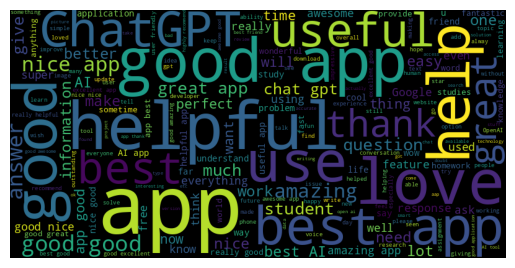

In [24]:
positive_text = " ".join(df[df['sentiment']=="Positive"]['review'])
wc = WordCloud(width=800, height=400).generate(positive_text)
plt.imshow(wc); plt.axis("off")

(np.float64(-0.5), np.float64(799.5), np.float64(399.5), np.float64(-0.5))

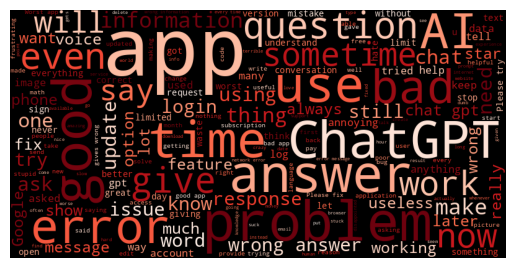

In [25]:
negative_text = " ".join(df[df['sentiment']=="Negative"]['review'])
wc = WordCloud(width=800, height=400, colormap='Reds').generate(negative_text)
plt.imshow(wc); plt.axis("off")